# 단어 벡터화

<img src="https://i.imgur.com/hii5VdV.png" width="600" align="left">

https://scikit-learn.org/stable/modules/feature_extraction.html

### 라이브러리 로드

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 시각화를 위한 한글폰트 설정

In [3]:
# # Backend.AI에서는 에러가 발생했다.
# def get_font_family():
#     """
#     시스템 환경에 따른 기본 폰트명을 반환하는 함수
#     """
#     import platform
#     system_name = platform.system()

#     if system_name == "Darwin" :
#         font_family = "AppleGothic"
#     elif system_name == "Windows":
#         font_family = "Malgun Gothic"
#     else:
#         # Linux(Colab)
#         !apt-get install fonts-nanum -qq  > /dev/null
#         !fc-cache -fv

#         import matplotlib as mpl
#         mpl.font_manager._rebuild()
#         findfont = mpl.font_manager.fontManager.findfont
#         mpl.font_manager.findfont = findfont
#         mpl.backends.backend_agg.findfont = findfont
        
#         font_family = "NanumBarunGothic"
#     return font_family

# plt.style.use("seaborn")
# plt.rc("font", family=get_font_family())
# plt.rc("axes", unicode_minus=False)

# %config InlineBackend.figure_format = 'retina'

In [4]:
# !pip install koreanize_matplotlib

In [5]:
import koreanize_matplotlib

<AxesSubplot:title={'center':'한글'}>

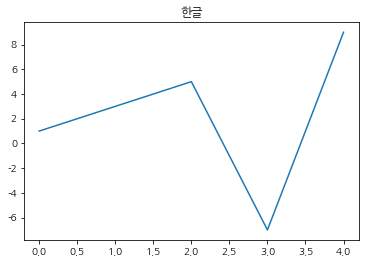

In [6]:
# 한글이 제대로 보이는지 확인
pd.Series([1, 3, 5, -7, 9]).plot(title='한글')

## 코드 한눈에 모아보기

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# LIKELION AI SCHOOL 6기 박조은 강사님의 간단한 연습용 예제입니다.
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.", 
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."]

vectorizer = CountVectorizer()  # ngram_range / min_df / max_df / max_features / stop_words / ...
dtm = vectorizer.fit_transform(corpus)

# 결과 출력
print(vectorizer.get_feature_names_out())
pd.DataFrame(dtm.toarray(), columns=list(vectorizer.get_feature_names_out()))

['거리두기' '거리두기와' '문의입니다' '버스' '상생지원금' '선별진료소' '승강장' '안내입니다' '요금' '운행시간'
 '운행시간과' '위치' '지하철' '코로나' '택시' '터미널']


,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


## 이제 하나씩 차근차근 해보기

### 분석할 문서

In [8]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.", 
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."]

### BoW (Bag of Words)

단어 <u>순서는 전혀 고려하지 않고</u>, <b>단어의 출현 빈도(frequency)</b> 기반의 텍스트 데이터의 수치화 표현 방법  
순서를 무사히는 점을 보완하기 위해 추후 n개의 단어를 사용하는 n-gram을 사용할 것이다.

```
(1) 각 단어에 고유한 정수 인덱스를 부여한다.  # 단어 집합 생성
(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만든다. 
```

sklearn의 text featuring을 위한 API
* `CountVectorizer`
* `TfidfVectorizer`

#### CountVectorizer
사이킷런 클래스 중 CountVectorizer는 <u>단어의 빈도를 Count하여 Vector로 만들어준다</u>.

파라미터
* `ngram_range`
* `min_df`
* `max_df`
* `max_features`
* `stop_words`
* ...

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

##### DTM (Document-Term Matrix)
서로 다른 문서들의 BoW들을 결합해 행렬로 표현. 즉 여러 문서에서 등장한 단어들의 빈도를 행렬의 값으로 표기한 것

In [10]:
dtm = vectorizer.fit_transform(corpus)  # 텍스트 문서 모음을 토큰 수 행렬로 변환
dtm

<8x16 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [11]:
# get_feature_names_out() 로 단어 사전 보기
vocab = vectorizer.get_feature_names_out()
vocab

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [12]:
# cvect.vocabulary_ 로 단어 사전 및 인덱스 보기
print(vectorizer.vocabulary_)

{'코로나': 13, '거리두기와': 1, '상생지원금': 4, '문의입니다': 2, '지하철': 12, '운행시간과': 10, '요금': 8, '승강장': 6, '선별진료소': 5, '버스': 3, '운행시간': 9, '터미널': 15, '위치': 11, '안내입니다': 7, '거리두기': 0, '택시': 14}


In [13]:
dtm.toarray()  # 원핫인코딩이랑 비슷한 형태

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [14]:
# TF(Term Frequency)
dtm_df = pd.DataFrame(dtm.toarray(), columns=vocab)
dtm_df

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [15]:
# 전체 문서에서 단어 빈도의 합계
dtm_df.sum().to_frame().T

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,1,1,6,2,1,1,2,2,1,1,1,1,3,4,1,1


In [16]:
# DF(Documnet Frequency)
(dtm_df != 0).sum().to_frame().T

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,1,1,6,2,1,1,2,2,1,1,1,1,2,3,1,1


In [17]:
# 원시 문서 corpus 와 document-term matrix 를 비교해보기
corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

##### `ngram_range`

<img src="https://user-images.githubusercontent.com/80589294/179575132-f7cae2e7-5f6f-409c-9ffb-f6f98fbe9421.png" width=600>


Bag of Words 모델이 단어 순서를 완전히 무시하는 점을 어느 정도 보강하기 위한 n_gram(n개의 토큰을 묶어서 사용) 범위를 설정할 수 있다.  
`ngram_range(min_n, max_n)`처럼 튜플 형태로 지정한다. 

In [18]:
# 단어가 너무 많아서 출력이 오래 걸릴 땐 max_columns 값을 조정할 수 있다
# pd.options.display.max_columns = None

In [19]:
# ngram_range(min_n, max_n)
vectorizer = CountVectorizer(ngram_range=(1,2))
dtm = vectorizer.fit_transform(corpus)
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())
print('단어 수:', len(vectorizer.vocabulary_))
print('사전:', vectorizer.get_feature_names_out())
dtm_df.style.background_gradient()

단어 수: 36
사전: ['거리두기' '거리두기 안내입니다' '거리두기와' '거리두기와 코로나' '문의입니다' '버스' '버스 운행시간' '버스 터미널'
 '상생지원금' '상생지원금 문의입니다' '선별진료소' '선별진료소 문의입니다' '승강장' '승강장 문의입니다' '안내입니다'
 '요금' '요금 문의입니다' '운행시간' '운행시간 문의입니다' '운행시간과' '운행시간과 지하철' '위치' '위치 안내입니다'
 '지하철' '지하철 승강장' '지하철 요금' '지하철 운행시간과' '코로나' '코로나 거리두기' '코로나 거리두기와'
 '코로나 상생지원금' '코로나 선별진료소' '택시' '택시 승강장' '터미널' '터미널 위치']


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [20]:
dtm_df.sum().to_frame().T

,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,...,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,1,1,1,1,6,2,1,1,1,1,...,1,4,1,1,1,1,1,1,1,1


In [21]:
# DF
(dtm_df != 0).sum().to_frame().T

,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,...,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,1,1,1,1,6,2,1,1,1,1,...,1,3,1,1,1,1,1,1,1,1


In [22]:
# 위 내용을 함수로 정의
def display_transform_dtm(vectorizer, corpus):
    """
    모델을 받아 변환을 하고 문서 용어 행렬을 반환하는 함수
    """
    dtm = vectorizer.fit_transform(corpus)
    vocab = vectorizer.get_feature_names_out()
    print('단어 수:', len(vectorizer.vocabulary_))
    print(vocab)
    dtm_df = pd.DataFrame(dtm.toarray(), columns=vocab)
    # display(dtm_df.style.background_gradient())
    return dtm_df

In [23]:
display_transform_dtm(CountVectorizer(ngram_range=(1,2)), corpus)

단어 수: 36
['거리두기' '거리두기 안내입니다' '거리두기와' '거리두기와 코로나' '문의입니다' '버스' '버스 운행시간' '버스 터미널'
 '상생지원금' '상생지원금 문의입니다' '선별진료소' '선별진료소 문의입니다' '승강장' '승강장 문의입니다' '안내입니다'
 '요금' '요금 문의입니다' '운행시간' '운행시간 문의입니다' '운행시간과' '운행시간과 지하철' '위치' '위치 안내입니다'
 '지하철' '지하철 승강장' '지하철 요금' '지하철 운행시간과' '코로나' '코로나 거리두기' '코로나 거리두기와'
 '코로나 상생지원금' '코로나 선별진료소' '택시' '택시 승강장' '터미널' '터미널 위치']


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,...,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0,0,1,1,1,0,0,0,1,1,...,0,2,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [24]:
display_transform_dtm(CountVectorizer(ngram_range=(2,3)), corpus)

단어 수: 33
['거리두기 안내입니다' '거리두기와 코로나' '거리두기와 코로나 상생지원금' '버스 운행시간' '버스 운행시간 문의입니다'
 '버스 터미널' '버스 터미널 위치' '상생지원금 문의입니다' '선별진료소 문의입니다' '승강장 문의입니다' '요금 문의입니다'
 '운행시간 문의입니다' '운행시간과 지하철' '운행시간과 지하철 요금' '위치 안내입니다' '지하철 승강장'
 '지하철 승강장 문의입니다' '지하철 요금' '지하철 요금 문의입니다' '지하철 운행시간과' '지하철 운행시간과 지하철'
 '코로나 거리두기' '코로나 거리두기 안내입니다' '코로나 거리두기와' '코로나 거리두기와 코로나' '코로나 상생지원금'
 '코로나 상생지원금 문의입니다' '코로나 선별진료소' '코로나 선별진료소 문의입니다' '택시 승강장' '택시 승강장 문의입니다'
 '터미널 위치' '터미널 위치 안내입니다']


,거리두기 안내입니다,거리두기와 코로나,거리두기와 코로나 상생지원금,버스 운행시간,버스 운행시간 문의입니다,버스 터미널,버스 터미널 위치,상생지원금 문의입니다,선별진료소 문의입니다,승강장 문의입니다,...,코로나 거리두기와,코로나 거리두기와 코로나,코로나 상생지원금,코로나 상생지원금 문의입니다,코로나 선별진료소,코로나 선별진료소 문의입니다,택시 승강장,택시 승강장 문의입니다,터미널 위치,터미널 위치 안내입니다
0,0,1,1,0,0,0,0,1,0,0,...,1,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


##### `min_df`

전체 문서에 걸쳐서 <u>너무 낮은 빈도수</u>를 가지는 단어 피처를 제외하기 위한 파라미터다.  
`min_df=2`처럼 정수나, `min_df=.05`같이 0.0~1.0 사이의 소수의 값을 가질 수 있다.

In [25]:
cvect = CountVectorizer(ngram_range=(1,2), min_df=.2)
display_transform_dtm(cvect, corpus).style.background_gradient()

단어 수: 7
['문의입니다' '버스' '승강장' '승강장 문의입니다' '안내입니다' '지하철' '코로나']


,문의입니다,버스,승강장,승강장 문의입니다,안내입니다,지하철,코로나
0,1,0,0,0,0,0,2
1,1,0,0,0,0,2,0
2,1,0,1,1,0,1,0
3,1,0,0,0,0,0,1
4,1,1,0,0,0,0,0
5,0,1,0,0,1,0,0
6,0,0,0,0,1,0,1
7,1,0,1,1,0,0,0


##### `max_df`

전체 문서에 걸쳐서 <u>너무 높은 빈도수</u>를 가지는 단어 피처를 제외하기 위한 파라미터다.  
`max_df=100`처럼 정수나, `max_df=.95`같이 0.0~1.0 사이의 소수의 값을 가질 수 있다.

In [26]:
cvect = CountVectorizer(min_df=.2, max_df=.6, ngram_range=(1,4))
display_transform_dtm(cvect, corpus).style.background_gradient()

단어 수: 6
['버스' '승강장' '승강장 문의입니다' '안내입니다' '지하철' '코로나']


,버스,승강장,승강장 문의입니다,안내입니다,지하철,코로나
0,0,0,0,0,0,2
1,0,0,0,0,2,0
2,0,1,1,0,1,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,1,0,0,1,0,0
6,0,0,0,1,0,1
7,0,1,1,0,0,0


##### `max_features`

추출하는 <u>피처 개수를 제한</u>한다.  
예를 들어 `max_features=2000`라고 지정하면, 가장 높은 빈도의 단어 순으로 정렬해 2000개까지만 피처로 추출한다.

In [27]:
cvect = CountVectorizer(min_df=.01, max_df=.6, ngram_range=(1,4), max_features=30)
display_transform_dtm(cvect, corpus).style.background_gradient()

단어 수: 30
['거리두기' '버스' '승강장' '승강장 문의입니다' '안내입니다' '운행시간과 지하철 요금 문의입니다' '위치 안내입니다'
 '지하철' '지하철 승강장' '지하철 승강장 문의입니다' '지하철 요금' '지하철 요금 문의입니다' '지하철 운행시간과'
 '지하철 운행시간과 지하철' '지하철 운행시간과 지하철 요금' '코로나' '코로나 거리두기' '코로나 거리두기 안내입니다'
 '코로나 거리두기와' '코로나 거리두기와 코로나' '코로나 거리두기와 코로나 상생지원금' '코로나 상생지원금'
 '코로나 상생지원금 문의입니다' '코로나 선별진료소' '코로나 선별진료소 문의입니다' '택시' '택시 승강장'
 '택시 승강장 문의입니다' '터미널' '터미널 위치']


,거리두기,버스,승강장,승강장 문의입니다,안내입니다,운행시간과 지하철 요금 문의입니다,위치 안내입니다,지하철,지하철 승강장,지하철 승강장 문의입니다,지하철 요금,지하철 요금 문의입니다,지하철 운행시간과,지하철 운행시간과 지하철,지하철 운행시간과 지하철 요금,코로나,코로나 거리두기,코로나 거리두기 안내입니다,코로나 거리두기와,코로나 거리두기와 코로나,코로나 거리두기와 코로나 상생지원금,코로나 상생지원금,코로나 상생지원금 문의입니다,코로나 선별진료소,코로나 선별진료소 문의입니다,택시,택시 승강장,택시 승강장 문의입니다,터미널,터미널 위치
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,2,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [28]:
cvect = CountVectorizer(min_df=.01, max_df=.9, ngram_range=(1,7), max_features=50)
display_transform_dtm(cvect, corpus).style.background_gradient()

단어 수: 50
['거리두기' '거리두기 안내입니다' '거리두기와' '거리두기와 코로나' '거리두기와 코로나 상생지원금'
 '거리두기와 코로나 상생지원금 문의입니다' '문의입니다' '버스' '버스 운행시간' '버스 운행시간 문의입니다' '버스 터미널'
 '버스 터미널 위치' '버스 터미널 위치 안내입니다' '상생지원금' '선별진료소' '선별진료소 문의입니다' '승강장'
 '승강장 문의입니다' '안내입니다' '요금' '요금 문의입니다' '운행시간' '운행시간 문의입니다'
 '운행시간과 지하철 요금 문의입니다' '위치' '위치 안내입니다' '지하철' '지하철 승강장' '지하철 승강장 문의입니다'
 '지하철 요금' '지하철 요금 문의입니다' '지하철 운행시간과' '지하철 운행시간과 지하철' '지하철 운행시간과 지하철 요금'
 '지하철 운행시간과 지하철 요금 문의입니다' '코로나' '코로나 거리두기' '코로나 거리두기 안내입니다' '코로나 거리두기와'
 '코로나 거리두기와 코로나' '코로나 거리두기와 코로나 상생지원금' '코로나 거리두기와 코로나 상생지원금 문의입니다'
 '코로나 상생지원금' '코로나 상생지원금 문의입니다' '코로나 선별진료소' '코로나 선별진료소 문의입니다' '택시' '택시 승강장'
 '택시 승강장 문의입니다' '터미널']


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,거리두기와 코로나 상생지원금,거리두기와 코로나 상생지원금 문의입니다,문의입니다,버스,버스 운행시간,버스 운행시간 문의입니다,버스 터미널,버스 터미널 위치,버스 터미널 위치 안내입니다,상생지원금,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과 지하철 요금 문의입니다,위치,위치 안내입니다,지하철,지하철 승강장,지하철 승강장 문의입니다,지하철 요금,지하철 요금 문의입니다,지하철 운행시간과,지하철 운행시간과 지하철,지하철 운행시간과 지하철 요금,지하철 운행시간과 지하철 요금 문의입니다,코로나,코로나 거리두기,코로나 거리두기 안내입니다,코로나 거리두기와,코로나 거리두기와 코로나,코로나 거리두기와 코로나 상생지원금,코로나 거리두기와 코로나 상생지원금 문의입니다,코로나 상생지원금,코로나 상생지원금 문의입니다,코로나 선별진료소,코로나 선별진료소 문의입니다,택시,택시 승강장,택시 승강장 문의입니다,터미널
0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


##### `stop_words`

불용어 (문장에 자주 등장하지만 "우리, 그, 그리고, 그래서" 등 관사, 전치사, 조사, 접속사 등의 단어로 문장 내에서 큰 의미를 갖지 않는 단어)  
예를 들면 `stop_words=['the','an','a']`

In [29]:
stop_words=["코로나", "문의입니다", '안내입니다']

cvect = CountVectorizer(stop_words=stop_words)
display_transform_dtm(cvect, corpus).style.background_gradient()

단어 수: 13
['거리두기' '거리두기와' '버스' '상생지원금' '선별진료소' '승강장' '요금' '운행시간' '운행시간과' '위치' '지하철'
 '택시' '터미널']


,거리두기,거리두기와,버스,상생지원금,선별진료소,승강장,요금,운행시간,운행시간과,위치,지하철,택시,터미널
0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,2,0,0
2,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,1,0,0,1
6,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,1,0


In [30]:
stop_words=["코로나", "문의입니다", "안내입니다", "와"]

cvect = CountVectorizer(min_df=.01, max_df=.9, 
                             ngram_range=(1,7), 
                             stop_words=stop_words, 
                             max_features=50)

display_transform_dtm(cvect, corpus).style.background_gradient()

단어 수: 26
['거리두기' '거리두기와' '거리두기와 상생지원금' '버스' '버스 운행시간' '버스 터미널' '버스 터미널 위치' '상생지원금'
 '선별진료소' '승강장' '요금' '운행시간' '운행시간과' '운행시간과 지하철' '운행시간과 지하철 요금' '위치' '지하철'
 '지하철 승강장' '지하철 요금' '지하철 운행시간과' '지하철 운행시간과 지하철' '지하철 운행시간과 지하철 요금' '택시'
 '택시 승강장' '터미널' '터미널 위치']


,거리두기,거리두기와,거리두기와 상생지원금,버스,버스 운행시간,버스 터미널,버스 터미널 위치,상생지원금,선별진료소,승강장,요금,운행시간,운행시간과,운행시간과 지하철,운행시간과 지하철 요금,위치,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,지하철 운행시간과 지하철,지하철 운행시간과 지하철 요금,택시,택시 승강장,터미널,터미널 위치
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,2,0,1,1,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


##### `analyzer`

피처 추출을 수행한 단위를 지정한다.  
디폴트는 `analyzer='word'`, 그외 `'char'`, `'char_wb'` 등이 올 수 있다

In [31]:
# analyzer='char_wb'

cvect = CountVectorizer(analyzer='char_wb')
display_transform_dtm(cvect, corpus).style.background_gradient()

단어 수: 46
[' ' '.' '간' '강' '거' '과' '금' '기' '나' '내' '널' '니' '다' '두' '로' '료' '리' '문'
 '미' '버' '별' '상' '생' '선' '소' '스' '승' '시' '안' '와' '요' '운' '원' '위' '의' '입'
 '장' '지' '진' '철' '치' '코' '택' '터' '하' '행']


,,.,간,강,거,과,금,기,나,내,널,니,다,두,로,료,리,문,미,버,별,상,생,선,소,스,승,시,안,와,요,운,원,위,의,입,장,지,진,철,치,코,택,터,하,행
0,10,1,0,0,1,0,1,1,2,0,0,1,1,1,2,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,2,0,0,0,0
1,10,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,2,0,2,0,0,0,0,2,1
2,6,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0
3,6,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0
4,6,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
5,8,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
6,6,1,0,0,1,0,0,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7,6,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0


In [32]:
cvect = CountVectorizer(analyzer='char_wb', min_df=.01, max_df=.9,
                       ngram_range=(1,7),
                       stop_words=stop_words,
                       max_features=50)
display_transform_dtm(cvect, corpus).style.background_gradient()

단어 수: 50
[' 문' ' 문의' ' 문의입' ' 문의입니' ' 문의입니다' ' 문의입니다.' ' 지' ' 지하' ' 지하철' ' 지하철 '
 ' 코' ' 코로' ' 코로나' ' 코로나 ' '나' '나 ' '내입니다.' '내입니다. ' '두' '로' '로나' '로나 '
 '리두' '문' '문의' '문의입' '문의입니' '문의입니다' '문의입니다.' '문의입니다. ' '시' '의' '의입' '의입니'
 '의입니다' '의입니다.' '의입니다. ' '지' '지하' '지하철' '지하철 ' '철' '철 ' '코' '코로' '코로나'
 '코로나 ' '하' '하철' '하철 ']


,문,문의,문의입,문의입니,문의입니다,문의입니다.,지,지하,지하철,지하철,코,코로,코로나,코로나,나,나,내입니다.,내입니다.,두,로,로나,로나,리두,문,문의,문의입,문의입니,문의입니다,문의입니다.,문의입니다.,시,의,의입,의입니,의입니다,의입니다.,의입니다.,지,지하,지하철,지하철,철,철,코,코로,코로나,코로나,하,하철,하철
0,1,1,1,1,1,1,0,0,0,0,2,2,2,2,2,2,0,0,1,2,2,2,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,2,2,2,2,0,0,0
1,1,1,1,1,1,1,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,0,0,0,0,2,2,2
2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1
3,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0
4,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0
7,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# analyzer='char'

cvect = CountVectorizer(analyzer="char", min_df=.01, max_df=.9, 
                        ngram_range=(1, 7),
                        stop_words=stop_words,
                        max_features=50)
display_transform_dtm(cvect, corpus).style.background_gradient()

단어 수: 50
[' 문' ' 문의' ' 문의입' ' 문의입니' ' 문의입니다' ' 문의입니다.' '나' '나 ' '나 거' '나 거리'
 '나 거리두' '나 거리두기' '내' '내입' '내입니' '내입니다' '내입니다.' '로' '로나' '로나 ' '문' '문의'
 '문의입' '문의입니' '문의입니다' '문의입니다.' '버스' '스 ' '승강' '승강장' '승강장 ' '시' '의' '의입'
 '의입니' '의입니다' '의입니다.' '지' '지하' '지하철' '지하철 ' '철' '철 ' '코' '코로' '코로나' '코로나 '
 '하' '하철' '하철 ']


,문,문의,문의입,문의입니,문의입니다,문의입니다.,나,나,나 거,나 거리,나 거리두,나 거리두기,내,내입,내입니,내입니다,내입니다.,로,로나,로나,문,문의,문의입,문의입니,문의입니다,문의입니다.,버스,스,승강,승강장,승강장,시,의,의입,의입니,의입니다,의입니다.,지,지하,지하철,지하철,철,철,코,코로,코로나,코로나,하,하철,하철
0,1,1,1,1,1,1,2,2,1,1,1,1,0,0,0,0,0,2,2,2,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,2,2,2,2,0,0,0
1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,0,0,0,0,2,2,2
2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1
3,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0
4,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0
7,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## TF-IDF

### `TfidfVectorizer`

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('count', CountVectorizer()),
                 ('tfid', TfidfTransformer())]).fit(corpus)
pipe['count'].transform(corpus).toarray()

pipe['tfid'].idf_

array([2.5040774 , 2.5040774 , 1.25131443, 2.09861229, 2.5040774 ,
       2.5040774 , 2.09861229, 2.09861229, 2.5040774 , 2.5040774 ,
       2.5040774 , 2.5040774 , 2.09861229, 1.81093022, 2.5040774 ,
       2.5040774 ])

In [35]:
t_dtm = pipe.transform(corpus)
t_dtm

<8x16 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [36]:
# TfidVectorizer는 CountVectorizer와 Pipeline을 합친 거라고 보면 된다
# 역문서빈도로 가중치를 나타냄

from sklearn.feature_extraction.text import TfidfVectorizer

tfidvect = TfidfVectorizer()

In [37]:
dtm = tfidvect.fit_transform(corpus)

In [38]:
# 배열 확인
pd.DataFrame(dtm.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,0.479919,0.239821,0.000000,0.479919,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.694148,0.000000,0.000000
1,0.000000,0.000000,0.222166,0.000000,0.000000,0.00000,0.000000,0.000000,0.444589,0.000000,0.444589,0.000000,0.745200,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.388500,0.000000,0.000000,0.00000,0.651563,0.000000,0.000000,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.375318,0.000000,0.000000,0.75107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.543168,0.000000,0.000000
4,0.000000,0.000000,0.357659,0.599839,0.000000,0.00000,0.000000,0.000000,0.000000,0.715732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.454195,0.000000,0.00000,0.000000,0.454195,0.000000,0.000000,0.000000,0.541948,0.000000,0.000000,0.000000,0.541948
6,0.670344,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.561801,0.000000,0.000000,0.000000,0.000000,0.000000,0.484788,0.000000,0.000000
7,0.000000,0.000000,0.357659,0.000000,0.000000,0.00000,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000


In [39]:
display_transform_dtm(tfidvect, corpus).style.background_gradient()

단어 수: 16
['거리두기' '거리두기와' '문의입니다' '버스' '상생지원금' '선별진료소' '승강장' '안내입니다' '요금' '운행시간'
 '운행시간과' '위치' '지하철' '코로나' '택시' '터미널']


,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0.000000,0.479919,0.239821,0.000000,0.479919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.694148,0.000000,0.000000
1,0.000000,0.000000,0.222166,0.000000,0.000000,0.000000,0.000000,0.000000,0.444589,0.000000,0.444589,0.000000,0.745200,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.388500,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.375318,0.000000,0.000000,0.751070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.543168,0.000000,0.000000
4,0.000000,0.000000,0.357659,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.454195,0.000000,0.000000,0.000000,0.454195,0.000000,0.000000,0.000000,0.541948,0.000000,0.000000,0.000000,0.541948
6,0.670344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.561801,0.000000,0.000000,0.000000,0.000000,0.000000,0.484788,0.000000,0.000000
7,0.000000,0.000000,0.357659,0.000000,0.000000,0.000000,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000


In [40]:
# TF-IDF 값이 높은 순
df_dtm = pd.DataFrame(dtm.toarray(), columns=tfidvect.get_feature_names_out())
df_dtm.replace(0, np.nan).max(axis=0).sort_values(ascending=False)

선별진료소    0.751070
지하철      0.745200
운행시간     0.715732
택시       0.715732
코로나      0.694148
거리두기     0.670344
승강장      0.651563
버스       0.599839
안내입니다    0.561801
위치       0.541948
터미널      0.541948
거리두기와    0.479919
상생지원금    0.479919
요금       0.444589
운행시간과    0.444589
문의입니다    0.388500
dtype: float64

In [41]:
# TF-IDF 값이 낮은 순
df_dtm.replace(0, np.nan).min(axis=0).sort_values()

문의입니다    0.222166
요금       0.444589
운행시간과    0.444589
버스       0.454195
안내입니다    0.454195
거리두기와    0.479919
상생지원금    0.479919
코로나      0.484788
위치       0.541948
터미널      0.541948
승강장      0.599839
지하철      0.651563
거리두기     0.670344
운행시간     0.715732
택시       0.715732
선별진료소    0.751070
dtype: float64

### IDF

In [42]:
idf = tfidvect.idf_
idf

array([2.5040774 , 2.5040774 , 1.25131443, 2.09861229, 2.5040774 ,
       2.5040774 , 2.09861229, 2.09861229, 2.5040774 , 2.5040774 ,
       2.5040774 , 2.5040774 , 2.09861229, 1.81093022, 2.5040774 ,
       2.5040774 ])

In [43]:
vocab = tfidvect.get_feature_names_out()
idf_dict = dict(zip(vocab, idf))

<AxesSubplot:>

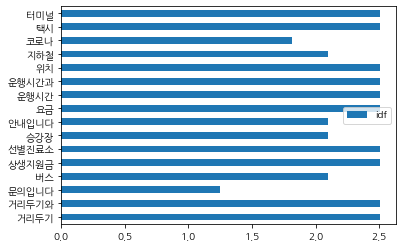

In [44]:
# idf_dict 값 시각화
pd.DataFrame(data=idf_dict.values(), 
             index=idf_dict.keys(), 
             columns=['idf']).plot.barh()

### TfidfVectorizer 의 다양한 기능 사용하기
* `ngram_range`
* `min_df`, `max_df`
* `max_features`
* `stop_words`
* `analyzer`

In [45]:
stop_words.append("과")
stop_words

['코로나', '문의입니다', '안내입니다', '와', '과']

In [46]:
# analyzer='char_wb', ngram_range=(2, 3), max_df=1.0, min_df=1

tfidfvect = TfidfVectorizer(analyzer='char_wb', ngram_range=(1, 5), max_df=1.0, min_df=1, stop_words=stop_words)
display_transform_dtm(tfidfvect, corpus)

단어 수: 223
[' ' ' 거' ' 거리' ' 거리두' ' 거리두기' ' 문' ' 문의' ' 문의입' ' 문의입니' ' 버' ' 버스' ' 버스 '
 ' 상' ' 상생' ' 상생지' ' 상생지원' ' 선' ' 선별' ' 선별진' ' 선별진료' ' 승' ' 승강' ' 승강장'
 ' 승강장 ' ' 안' ' 안내' ' 안내입' ' 안내입니' ' 요' ' 요금' ' 요금 ' ' 운' ' 운행' ' 운행시'
 ' 운행시간' ' 위' ' 위치' ' 위치 ' ' 지' ' 지하' ' 지하철' ' 지하철 ' ' 코' ' 코로' ' 코로나'
 ' 코로나 ' ' 택' ' 택시' ' 택시 ' ' 터' ' 터미' ' 터미널' ' 터미널 ' '.' '. ' '간' '간 '
 '간과' '간과 ' '강' '강장' '강장 ' '거' '거리' '거리두' '거리두기' '거리두기 ' '거리두기와' '과' '과 '
 '금' '금 ' '기' '기 ' '기와' '기와 ' '나' '나 ' '내' '내입' '내입니' '내입니다' '내입니다.' '널'
 '널 ' '니' '니다' '니다.' '니다. ' '다' '다.' '다. ' '두' '두기' '두기 ' '두기와' '두기와 ' '로'
 '로나' '로나 ' '료' '료소' '료소 ' '리' '리두' '리두기' '리두기 ' '리두기와' '리두기와 ' '문' '문의'
 '문의입' '문의입니' '문의입니다' '미' '미널' '미널 ' '버' '버스' '버스 ' '별' '별진' '별진료' '별진료소'
 '별진료소 ' '상' '상생' '상생지' '상생지원' '상생지원금' '생' '생지' '생지원' '생지원금' '생지원금 ' '선'
 '선별' '선별진' '선별진료' '선별진료소' '소' '소 ' '스' '스 ' '승' '승강' '승강장' '승강장 ' '시'
 '시 ' '시간' '시간 ' '시간과' '시간과 ' '안' '안내' '안내입' '안내입니' '안내입니다' '와' '와 ' '요'
 '요금' '요금 ' '운' '운행' '운행시' '운행시간' '운행시간 ' '운행

,,거,거리,거리두,거리두기,문,문의,문의입,문의입니,버,...,터미널,하,하철,하철,행,행시,행시간,행시간,행시간과,행시간과
0,0.421809,0.088521,0.088521,0.088521,0.088521,0.052782,0.052782,0.052782,0.052782,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.436920,0.000000,0.000000,0.000000,0.000000,0.054672,0.054672,0.054672,0.054672,0.000000,...,0.000000,0.183385,0.183385,0.183385,0.091693,0.091693,0.091693,0.000000,0.109408,0.109408
2,0.440766,0.000000,0.000000,0.000000,0.000000,0.091923,0.091923,0.091923,0.091923,0.000000,...,0.000000,0.154166,0.154166,0.154166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.372985,0.000000,0.000000,0.000000,0.000000,0.077787,0.077787,0.077787,0.077787,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.432147,0.000000,0.000000,0.000000,0.000000,0.090125,0.090125,0.090125,0.090125,0.151152,...,0.000000,0.000000,0.000000,0.000000,0.151152,0.151152,0.151152,0.180355,0.000000,0.000000
5,0.456904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119858,...,0.143015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.386469,0.135175,0.135175,0.135175,0.135175,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.451821,0.000000,0.000000,0.000000,0.000000,0.094228,0.094228,0.094228,0.094228,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
